In [1]:
### Setup packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

# Group 27 DSCI 100: Project Proposal

## 1. Introduction:
(Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question, make sure to remove this bit before we submit the final)

Life expectancy is a statistic that varies throughout countries based on many factors. A common question in healthcare continues to be asked: what can be done to improve life expectancy? As countries continue to improve on this aspect, the statistics are crucial to prove statements and observe trends. It is often dicussed how much effort should go into health expenditure which defines the amount spent on health care and services such as research, insurance, and more. 

Through this project the analysis of the relationship between life expectancy and health expenditure will be observed. 
"How much does a country's health expenditure predict it's average life expectency?"

The dataset used will list the data collected on life expectancy, health expenditure, bmi, mortality rates, and more... all sorted by country in an alphabetically ordered fashion. For this project however, the primary focus will be on the columns for country, life expectancy, and health expenditure.



## 2. Tidy Data:


**A. Our data was The Global Health Observatory (GHO) data repository under **World Health Organization (WHO)**: https://www.who.int/data/gho

- country 
- year

Mortality Variables
- life_expectancy: Life Expectancy in age
- adult_mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant_deaths: Number of Infant Deaths per 1000 population
- under_five_deaths: Number of under-five deaths per 1000 population

Health Variables
- hepatitis_b: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- measles: Measles - number of reported cases per 1000 population
- polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)


**B. We combine GDP and Population Data taken from the **World Bank**: https://databank.worldbank.org/home.aspx

- country
- year
- gdp (current USD)
- population (total)
- current health expenditure per capita (current USD)

We create new variables:

- Country classification (based on GDP per capita): Low-income (<4,000), Medium-income 
(4,000-13,000), High-income (13,000+)
- Health expenditure as a % of GDP (health expenditure / GDP)

The reasons for these new variables:
- Country classification seperates counrties into distinct groups based on the average economic status of its citizens, which will lead to a clearer and richer (information-wise) visualization by providing that additional context through color.
- Health expenditure determines how much of a country's total avaliable wealth it spends on its health systems. This information allows us to explore whether life expectancy is more closely predicted by the absolute amount of money spent, or if the amount of money relative to the country's wealth is a key factor.

### 2.1. Get Data
- First we can download the World Bank Inidicators database through R packages on CRAN.
- The WDI Package allows users to search and download data from over 40 datasets hosted by the World Bank, including the World Development Indicators (‘WDI’), International Debt Statistics, Doing Business, Human Capital Index, and Sub-national Poverty indicators.
- Details can be found here: [`WDI`](https://cran.r-project.org/package=WDI) (first release Aug 2013)

In [3]:
# Access Data
install.packages("WDI")
library(WDI)
new_wdi_cache <- WDIcache()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### WDI Indicator search
- Next we find out the IDs for the indicators we are interested in as listed above (e.g. GDP, population, and etc.)

In [12]:
# Mortality Variables:
WDIsearch("life expectancy at birth.*total", cache = new_wdi_cache)
WDIsearch("^mortality.*rate.*infant", cache = new_wdi_cache)
WDIsearch("mortality rate.*adult", cache = new_wdi_cache)
WDIsearch("mortality rate.*under-5", cache = new_wdi_cache)

indicator 
                         "SP.DYN.LE00.IN" 
                                     name 
"Life expectancy at birth, total (years)"

indicator,name
HF.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)"
HF.DYN.IMRT.IN.Q1,"Mortality rate, infant (per 1,000 live births): Q1 (lowest)"
HF.DYN.IMRT.IN.Q2,"Mortality rate, infant (per 1,000 live births): Q2"
HF.DYN.IMRT.IN.Q3,"Mortality rate, infant (per 1,000 live births): Q3"
HF.DYN.IMRT.IN.Q4,"Mortality rate, infant (per 1,000 live births): Q4"
HF.DYN.IMRT.IN.Q5,"Mortality rate, infant (per 1,000 live births): Q5 (highest)"
SP.DYN.IMRT.FE.IN,"Mortality rate, infant, female (per 1,000 live births)"
SP.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)"
SP.DYN.IMRT.MA.IN,"Mortality rate, infant, male (per 1,000 live births)"


indicator,name
SP.DYN.AMRT.FE,"Mortality rate, adult, female (per 1,000 female adults)"
SP.DYN.AMRT.MA,"Mortality rate, adult, male (per 1,000 male adults)"


indicator,name
HF.DYN.MORT,"Mortality rate, under-5 (per 1,000)"
HF.DYN.MORT.Q1,"Mortality rate, under-5 (per 1,000): Q1 (lowest)"
HF.DYN.MORT.Q2,"Mortality rate, under-5 (per 1,000): Q2"
HF.DYN.MORT.Q3,"Mortality rate, under-5 (per 1,000): Q3"
HF.DYN.MORT.Q4,"Mortality rate, under-5 (per 1,000): Q4"
HF.DYN.MORT.Q5,"Mortality rate, under-5 (per 1,000): Q5 (highest)"
SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)"
SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000 live births)"
SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000 live births)"
SPI.D1.5.CHLD.MORT,"Availability of Mortality rate, under-5 (per 1,000 live births) data meeting quality standards according to UN IGME (5 year moving average)"


indicator,name
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)


In [21]:
# Health Indicators:

WDIsearch("malaria", cache = new_wdi_cache)
WDIsearch("measles", cache = new_wdi_cache)
WDIsearch("cancer", cache = new_wdi_cache)
WDIsearch("hiv", cache = new_wdi_cache)

indicator,name
DT.ODA.ALLD.MLR.CNTRL.CD,"ODA aid disbursements for Malaria control, all donors (current US$)"
DT.ODA.DACD.MLR.CNTRL.CD,"ODA aid disbursements for Malaria control, DAC donors total (current US$)"
DT.ODA.MULTI.MLR.CNTRL.CD,"ODA aid disbursements for Malaria control, multilateral donors total (current US$)"
IN.HLTH.MALARIA.CASES,Malaria - Cases
IN.HLTH.MALARIA.DEATH,Malaria - Deaths
SH.MLR.CSES.TOTL,Reported clinical malaria cases (total)
SH.MLR.DTHS.CHLD.ZS,Deaths among children under five years of age due to malaria (%)
SH.MLR.DTHS.TOTL,Reported malaria deaths (total)
SH.MLR.INCD,"Notified cases of malaria (per 100,000 people)"
SH.MLR.INCD.P3,"Incidence of malaria (per 1,000 population at risk)"


indicator,name
HF.IMM.MEAS,"Immunization, measles (% of children ages 15-23 months)"
HF.IMM.MEAS.Q1,"Immunization, measles (% of children ages 15-23 months): Q1 (lowest)"
HF.IMM.MEAS.Q2,"Immunization, measles (% of children ages 15-23 months): Q2"
HF.IMM.MEAS.Q3,"Immunization, measles (% of children ages 15-23 months): Q3"
HF.IMM.MEAS.Q4,"Immunization, measles (% of children ages 15-23 months): Q4"
HF.IMM.MEAS.Q5,"Immunization, measles (% of children ages 15-23 months): Q5 (highest)"
SH.IMM.MEA2,"Immunization, measles second dose (% of children by the nationally recommended age)"
SH.IMM.MEAS,"Immunization, measles (% of children ages 12-23 months)"
SH.IMM.MEAS.Q1.ZS,Vaccinations (Measles) (% of children ages 12-23 months): Q1 (lowest)
SH.IMM.MEAS.Q2.ZS,Vaccinations (Measles) (% of children ages 12-23 months): Q2


indicator,name
SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)"
SH.DYN.NCOM.MA.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)"
SH.DYN.NCOM.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)"


indicator,name
5.51.01.05.hiv,HIV/AIDS
DT.ODA.ALLD.HIV.CNTRL.CD,"ODA aid disbursements for STD control including HIV/AIDS, all donors (current US$)"
DT.ODA.ALLD.HIV.MITI.CD,"ODA aid disbursements for Social mitigation of HIV/AIDS, all donors (current US$)"
DT.ODA.DACD.HIV.CNTRL.CD,"ODA aid disbursements for STD control including HIV/AIDS, DAC donors (current US$)"
DT.ODA.DACD.HIV.MITI.CD,"ODA aid disbursements for Social mitigation of HIV/AIDS, DAC donors (current US$)"
DT.ODA.MULTI.HIV.CNTRL.CD,"ODA aid disbursements for STD control including HIV/AIDS, Multilateral donors (current US$)"
DT.ODA.MULTI.HIV.MITI.CD,"ODA aid disbursements for Social mitigation of HIV/AIDS, Multilateral donors (current US$)"
HF.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages 15-49)"
HF.DYN.AIDS.ZS.Q1,"Prevalence of HIV, total (% of population ages 15-49): Q1 (lowest)"
HF.DYN.AIDS.ZS.Q2,"Prevalence of HIV, total (% of population ages 15-49): Q2"


In [19]:
# Economic Indicators:
WDIsearch("gdp.*current US\\$", cache = new_wdi_cache)
WDIsearch("population.*total", cache = new_wdi_cache)
WDIsearch("Government health expenditure", cache = new_wdi_cache)

indicator,name
NV.SRV.DISC.CD,"Discrepancy in GDP, value added (current US$)"
NY.GDP.DISC.CD,Discrepancy in expenditure estimate of GDP (current US$)
NY.GDP.MKTP.CD,GDP (current US$)
NY.GDP.PCAP.CD,GDP per capita (current US$)
NYGDPMKTPSACD,"GDP,current US$,millions,seas. adj.,"


indicator,name
BAR.POP.1519,"Barro-Lee: Population in thousands, age 15-19, total"
BAR.POP.15UP,"Barro-Lee: Population in thousands, age 15+, total"
BAR.POP.2024,"Barro-Lee: Population in thousands, age 20-24, total"
BAR.POP.2529,"Barro-Lee: Population in thousands, age 25-29, total"
BAR.POP.25UP,"Barro-Lee: Population in thousands, age 25+, total"
BAR.POP.3034,"Barro-Lee: Population in thousands, age 30-34, total"
BAR.POP.3539,"Barro-Lee: Population in thousands, age 35-39, total"
BAR.POP.4044,"Barro-Lee: Population in thousands, age 40-44, total"
BAR.POP.4549,"Barro-Lee: Population in thousands, age 45-49, total"
BAR.POP.5054,"Barro-Lee: Population in thousands, age 50-54, total"


indicator,name
SH.XPD.GHED.CH.ZS,Domestic general government health expenditure (% of current health expenditure)
SH.XPD.GHED.GD.ZS,Domestic general government health expenditure (% of GDP)
SH.XPD.GHED.GE.ZS,Domestic general government health expenditure (% of general government expenditure)
SH.XPD.GHED.PC.CD,Domestic general government health expenditure per capita (current US$)
SH.XPD.GHED.PP.CD,"Domestic general government health expenditure per capita, PPP (current international $)"
SH.XPD.PCAP.GX,Government health expenditure per capita (current US$)


In [11]:
# adding variables

combined_data_mutated <- combined_data %>% 
    mutate(gdp_per_capita = gdp / population) %>%
    mutate(health_exp_to_gdp = health_exp_per_capita / gdp_per_capita * 100) %>%
    mutate(gdp_classification = as.factor(ifelse(gdp_per_capita < 4000, "Low-Income",
                                      ifelse(gdp_per_capita < 13000,"Medium-Income", 
                                                         "High-Income"))))

In [63]:
## CELL FOR WHY NEED EXPLANATIONS FOR WHY WE'RE USING 25 - 75 SPLIT (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

In [37]:
# Spliting data into training and testing
set.seed(1011) # DO NOT CHANGE

combined_split <- initial_split(combined_data_mutated, prop = 0.75)
training <- training(combined_split)
testing <- testing(combined_split)


### 3. Tables & Graphs:

**3.1. Tables:**

- Table 1: Summary Table of number of observations for gdp_classification
- Table 2: Average health expenditure per capita for each gdp_classification
- Table 3: Average gdp per capita for each gdp_classification

In [73]:
## NEED EXPLANATION FOR WHY SUMMARY TABLES ARE GOOD (REMOVE THIS CELL AND INCORPORATE EXP. IN ABOVE TEXT CELL)

In [59]:
# Table 1
training %>%
    group_by(gdp_classification) %>%
    summarize(oberservations_n = n())

# Table 2
training %>%
    group_by(gdp_classification) %>%
    summarize(average_heath_exp = mean(health_exp_per_capita, na.rm = TRUE)) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

# Table 3
training %>%
    group_by(gdp_classification) %>%
    summarize(average_gdp = mean(gdp_per_capita, na.rm = TRUE)) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,oberservations_n
<fct>,<int>
High-Income,541
Low-Income,1092
Medium-Income,501
NA,44


`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,average_heath_exp
<fct>,<dbl>
High-Income,2758.48040
Low-Income,81.91635
Medium-Income,420.94901


`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,average_gdp
<fct>,<dbl>
High-Income,35440.933
Low-Income,1480.535
Medium-Income,7255.044


**3.2. Graphs:**


**Graph Set 1**

We graph the average ratio of health expenditure per capita to GDP per capita of each low, medium, and high income countries (classified by GDP) across time.

`summarise()` regrouping output by 'gdp_classification' (override with `.groups` argument)



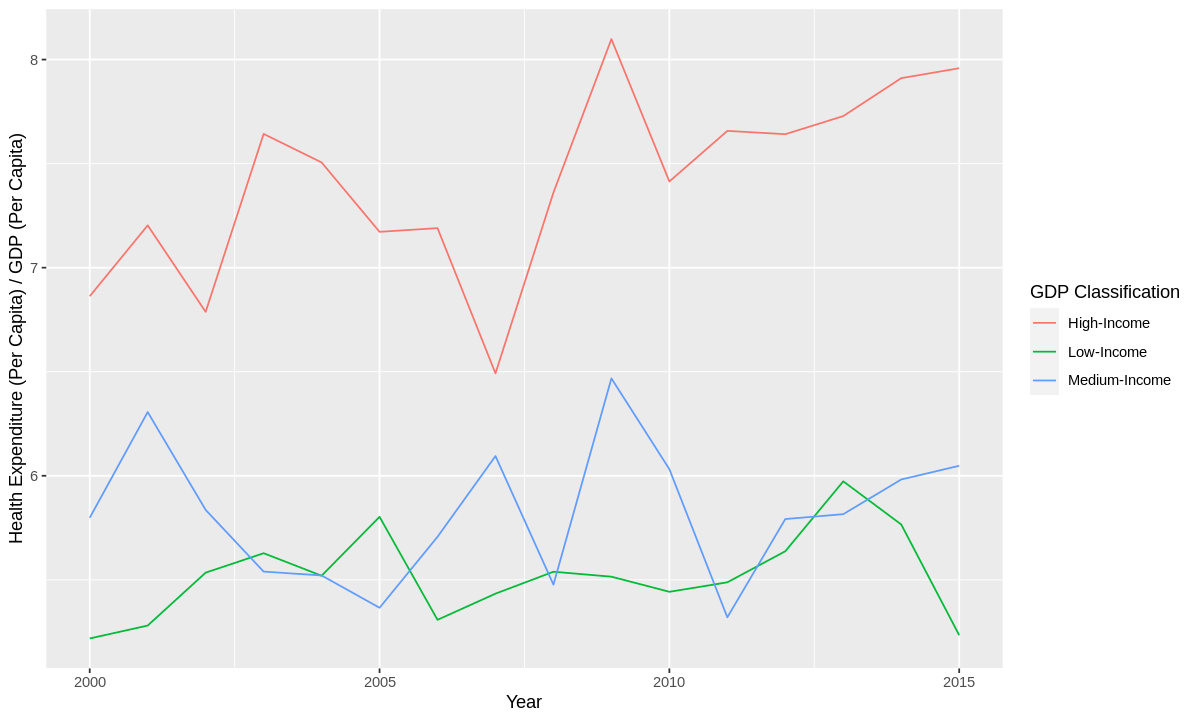

In [39]:
options(repr.plot.width = 10, repr.plot.height = 6)

average_ratio <- training %>%
    select(country, year, gdp_classification, health_exp_to_gdp) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income") %>%
    group_by(gdp_classification, year) %>%
    summarize(average_ratio = mean(health_exp_to_gdp, na.rm = TRUE))

Proposal_Plot_1 <- average_ratio %>%
ggplot(aes(x = year, y = average_ratio, color = gdp_classification))+
geom_line()+
labs(x= "Year", y= "Health Expenditure (Per Capita) / GDP (Per Capita)", color = "GDP Classification") 

Proposal_Plot_1

In [61]:
## THIS IS THE EXPLANATIONS CELL FOR PP1.1 (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

**Graph Set 2**

We graph mortality variables against health expenditure for 2013 in the training set.

Warning message:
“Removed 7 rows containing missing values (geom_point).”


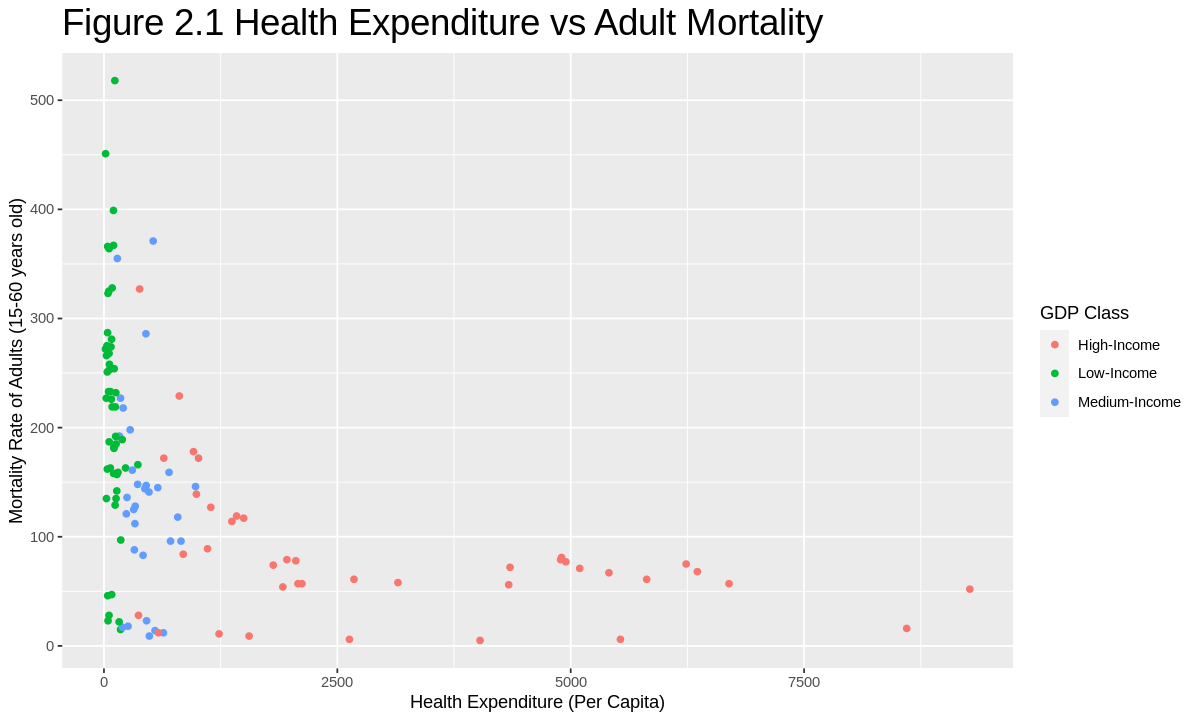

In [40]:
options(repr.plot.width = 10, repr.plot.height = 6)

life_expectancy_2013 <- training %>%
    filter(year == 2013) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

Proposal_Plot_2.1<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = adult_mortality, 
               color = gdp_classification))+
    geom_point()+
    labs(x = "Health Expenditure (Per Capita)", 
         y = "Mortality Rate of Adults (15-60 years old)", 
         color = "GDP Class") +
    ggtitle("Figure 2.1 Health Expenditure vs Adult Mortality") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.1

In [31]:
## THIS IS EXPLANATIONS CELL FOR PP2.1 (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

Warning message:
“Removed 7 rows containing missing values (geom_point).”


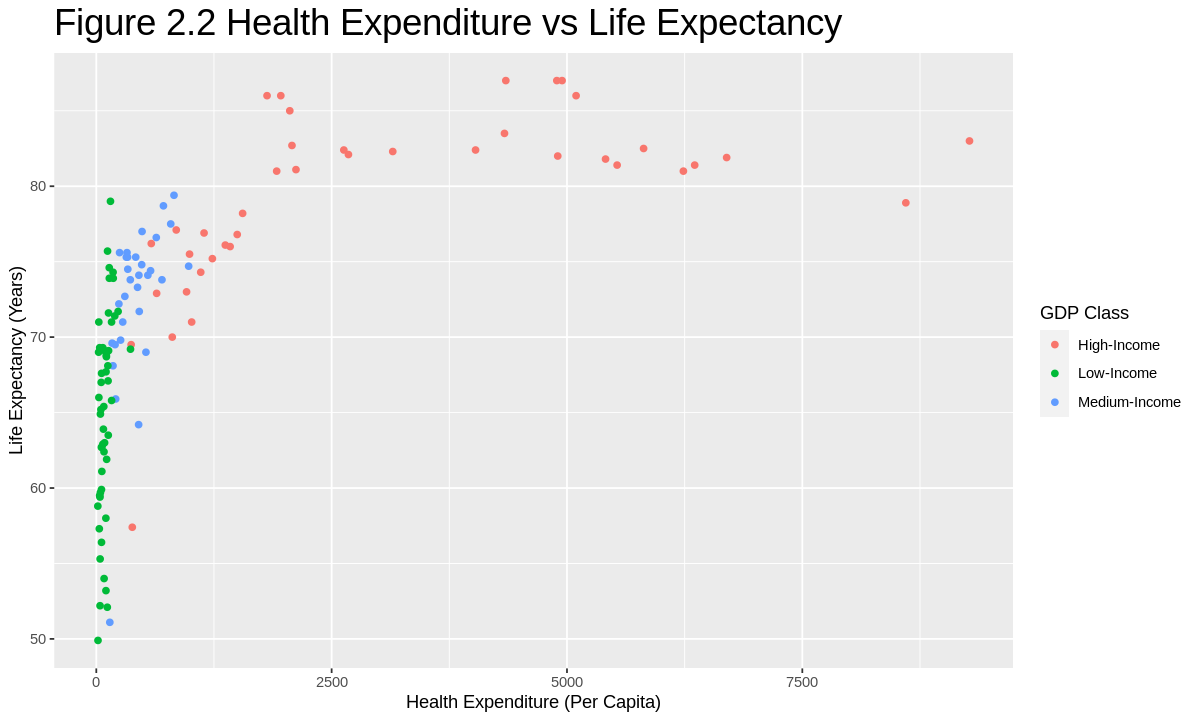

In [41]:
options(repr.plot.width = 10, repr.plot.height = 6)

Proposal_Plot_2.2<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = life_expectancy, color = gdp_classification))+
    geom_point()+
    labs(y = "Life Expectancy (Years)", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 2.2 Health Expenditure vs Life Expectancy") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.2

In [26]:
##THIS IS THE EXPLANATIONS CELL FOR PP2.2 (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


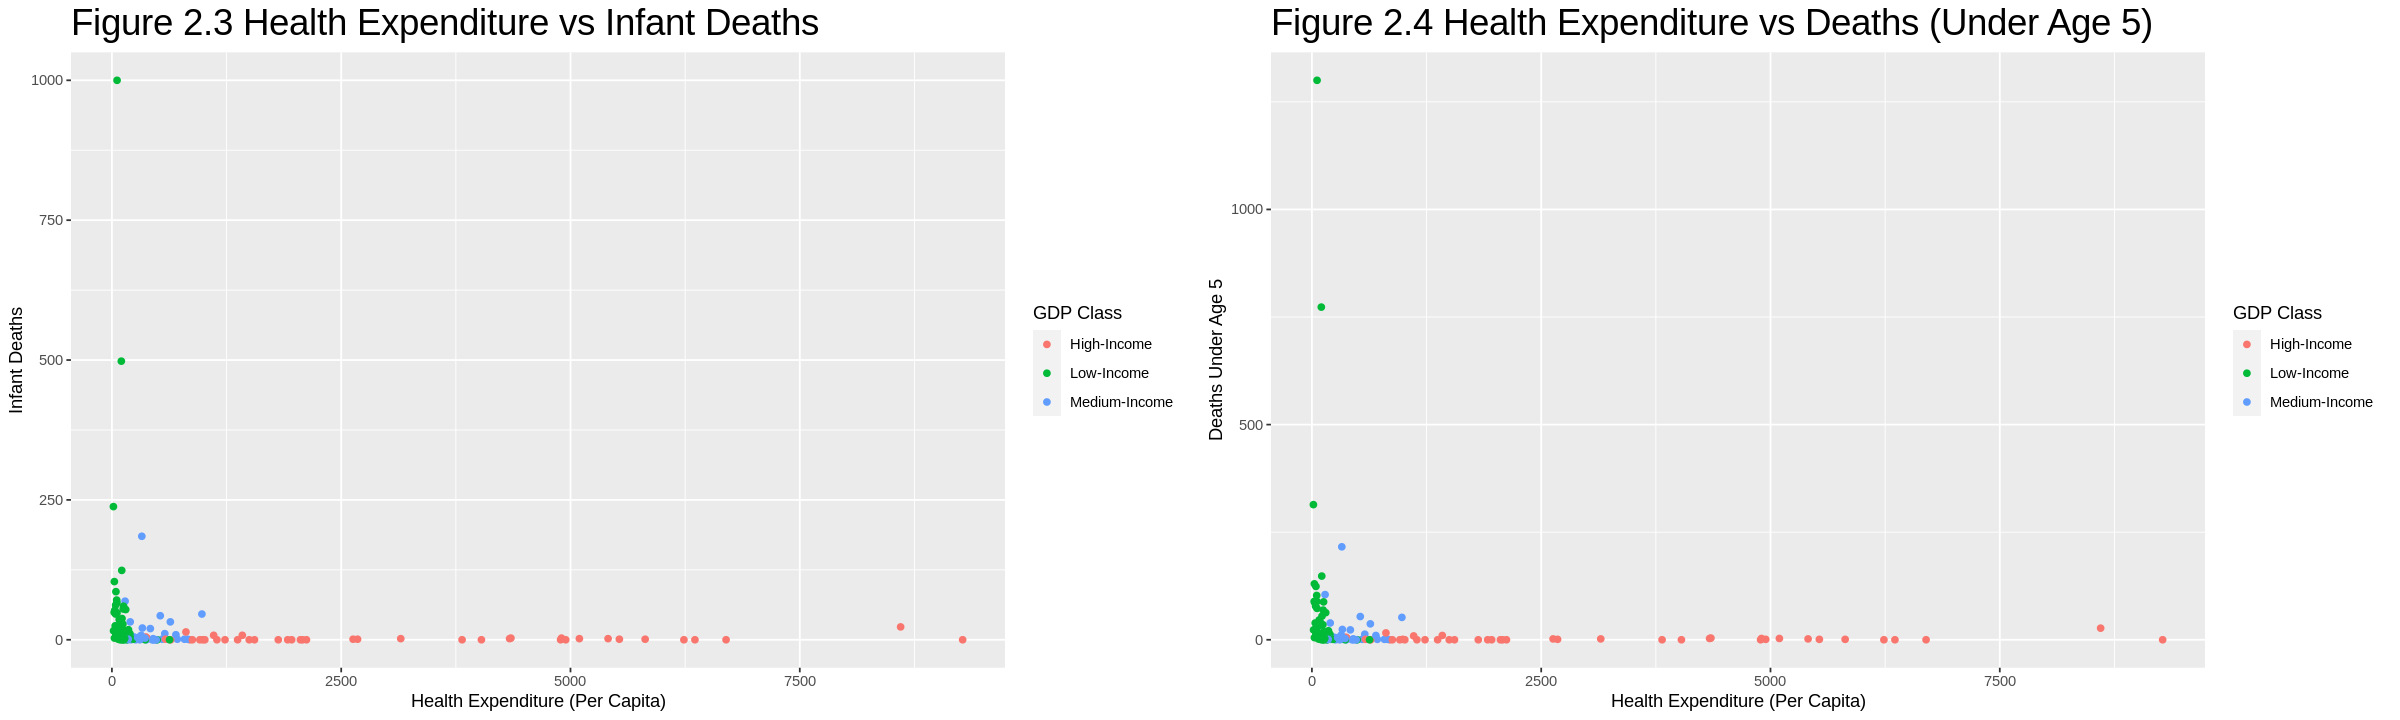

In [42]:
Proposal_Plot_2.3<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = infant_deaths, 
               color = gdp_classification)) +
    geom_point()+
    labs(y = "Infant Deaths", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 2.3 Health Expenditure vs Infant Deaths") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.4 <- life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = under_five_deaths, 
               color = gdp_classification))+
    geom_point()+
    labs(y = "Deaths Under Age 5", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 2.4 Health Expenditure vs Deaths (Under Age 5)") +
    theme(plot.title = element_text(size=22))

options(repr.plot.width = 20, repr.plot.height = 6)
plot_grid(Proposal_Plot_2.3, Proposal_Plot_2.4, ncol = 2)

In [25]:
##THIS IS THE EXPLANATIONS CELL FOR PP2.3 and PP2.4 (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

**Graph Set 3**

We graph health outcome variables against health expenditure for 2013

Warning message:
“Removed 2 rows containing missing values (geom_point).”


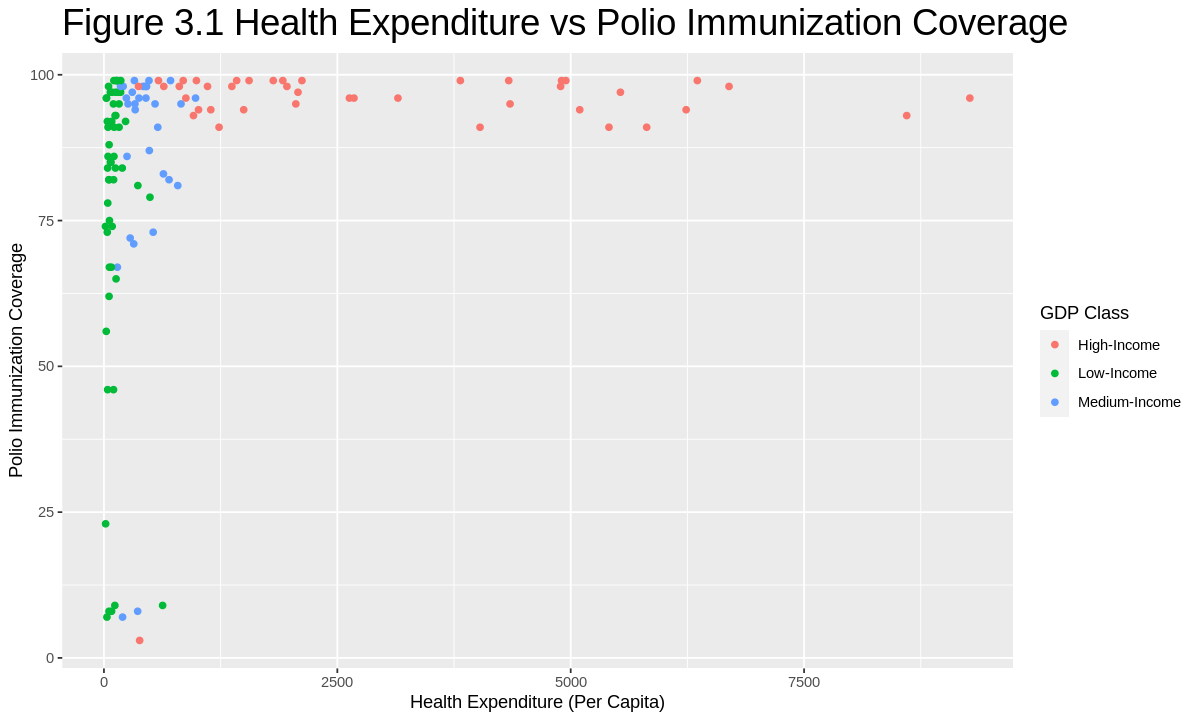

In [69]:
options(repr.plot.width = 10, repr.plot.height = 6)

Proposal_Plot_3.1 <- life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = polio, 
               color = gdp_classification)) +
    geom_point() +
    labs(y = "Polio Immunization Coverage", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 3.1 Health Expenditure vs Polio Immunization Coverage") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_3.1

In [68]:
## THIS IS THE EXPLANATIONS CELL FOR PP3.1 (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


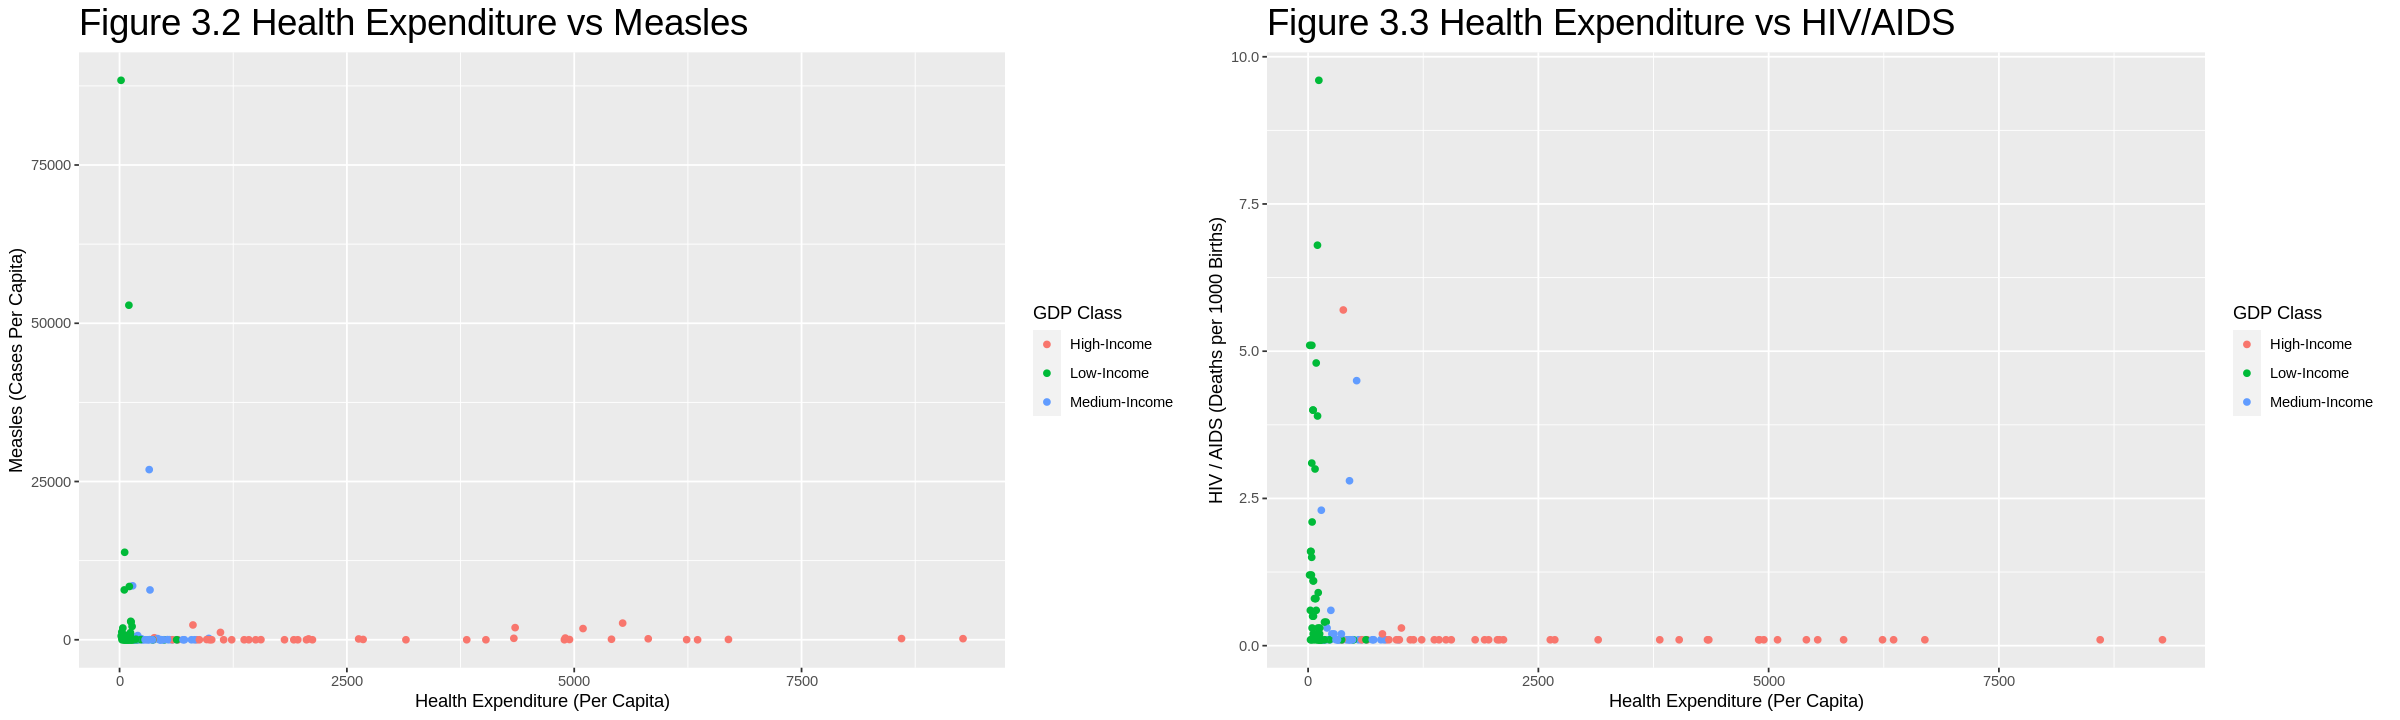

In [72]:
Proposal_Plot_3.2 <- life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = measles, 
               color = gdp_classification))+
    geom_point()+
    labs(y = "Measles (Cases Per Capita)", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 3.2 Health Expenditure vs Measles") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_3.3 <- life_expectancy_2013 %>%
ggplot(aes(x = health_exp_per_capita, 
           y = HIV_AIDS, 
           color = gdp_classification))+
    geom_point()+
    labs(y = "HIV / AIDS (Deaths per 1000 Births)", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 3.3 Health Expenditure vs HIV/AIDS") +
    theme(plot.title = element_text(size=22))

options(repr.plot.width = 20, repr.plot.height = 6)
plot_grid(Proposal_Plot_3.2, Proposal_Plot_3.3, ncol = 2)

In [64]:
## THIS IS THE EXPLANATIONS CELL FOR PP3.2, and PP3.3 (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

### 4. Method:

**To answer our question:** At a given health expenditure, what will be the level of mortality and health outcomes. How do they differ between high-income, medium-income, and low-income countries? 

We will be running a linear regression:

$Mortality_i = \beta_1 * HealthExpenditure + \beta_2 * GDPClassification + \epsilon$
$Health_i = \alpha_1 * HealthExpenditure + \alpha_2 * GDPClassification + \epsilon$

Where GDP Classification is a dummy variable and takes a value of 0 if low-income, 1 if medium-income, and 2 if high-income.

We want to use multiple mortality and health outcome variables rather than a single determinant as robustness checks and also to see how health expenditure affect different age groups and disease control. 

To visualize the outcomes, we would do a scatterplot and regression line. We would want to remove some outliers so that the plot display datapoints better.


### 5. Expected Outcomes:

**What do you expect to find?**
We expect to find that high income countries will naturally have a higher health expenditure per capita; however, we would like to see if there's a certain point where the marginal return of health expenditure begins to drop.

**What impact could such findings have?**
The results can potentially show what health inequality looks like around the world in terms of country's investments into health along with health outcomes and mortality. 

**What future questions could this lead to?**
This can lead to questions on how low-income countries can be supported and how dedicated funding and policies can improve livelihood around the world.

